In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#import the data|
data_df = pd.read_csv('data.csv',index_col='date', parse_dates=True)

In [3]:
data_df.head()

,Pollution,dew,temp,pressure,wind_dir,wind_speed,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [4]:
#checking for null values
data_df.isna().sum()

Pollution     0
dew           0
temp          0
pressure      0
wind_dir      0
wind_speed    0
snow          0
rain          0
dtype: int64

In [5]:
print(data_df.shape)
print(data_df.info())

(43800, 8)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
Pollution     43800 non-null float64
dew           43800 non-null int64
temp          43800 non-null float64
pressure      43800 non-null float64
wind_dir      43800 non-null object
wind_speed    43800 non-null float64
snow          43800 non-null int64
rain          43800 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.0+ MB
None


In [6]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pollution,43800.0,94.013516,92.252276,0.00,24.00,68.00,132.25,994.0
dew,43800.0,1.828516,14.429326,-40.00,-10.00,2.00,15.00,28.0
temp,43800.0,12.459041,12.193384,-19.00,2.00,14.00,23.00,42.0
pressure,43800.0,1016.447306,10.271411,991.00,1008.00,1016.00,1025.00,1046.0
wind_speed,43800.0,23.894307,50.022729,0.45,1.79,5.37,21.91,585.6
snow,43800.0,0.052763,0.760582,0.00,0.00,0.00,0.00,27.0
rain,43800.0,0.195023,1.416247,0.00,0.00,0.00,0.00,36.0


In [7]:
data_df[data_df['Pollution'] > 850]

,Pollution,dew,temp,pressure,wind_dir,wind_speed,snow,rain
date,,,,,,,,
2010-02-14 01:00:00,980.0,-14,-7.0,1029.0,cv,0.89,0,0
2012-01-23 01:00:00,994.0,-24,-12.0,1032.0,NW,4.92,0,0
2012-01-23 02:00:00,972.0,-24,-12.0,1032.0,NW,8.05,0,0
2013-01-12 20:00:00,886.0,-8,-7.0,1023.0,cv,1.34,0,0
2013-01-12 21:00:00,852.0,-9,-8.0,1023.0,NE,0.89,0,0
2013-01-12 22:00:00,858.0,-10,-9.0,1024.0,cv,0.89,0,0


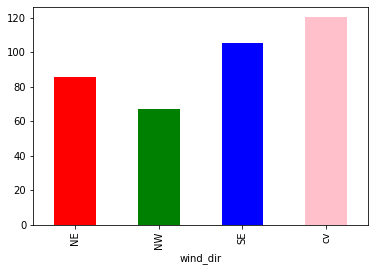

In [8]:
data_df.groupby('wind_dir')['Pollution'].mean().plot(kind='bar',color=['r','g','b','pink'])

In [10]:
data = pd.get_dummies(data_df, prefix=' ', prefix_sep=' ', columns=['wind_dir'], drop_first=True)

In [11]:
data.head()

,Pollution,dew,temp,pressure,wind_speed,snow,rain,NW,SE,cv
date,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,1,0


In [12]:
corr = data.corr()

In [13]:
corr['Pollution']

Pollution     1.000000
dew           0.157585
temp         -0.090798
pressure     -0.045544
wind_speed   -0.234362
snow          0.022226
rain         -0.049045
  NW         -0.202666
  SE          0.092175
  cv          0.148433
Name: Pollution, dtype: float64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 10 columns):
Pollution     43800 non-null float64
dew           43800 non-null int64
temp          43800 non-null float64
pressure      43800 non-null float64
wind_speed    43800 non-null float64
snow          43800 non-null int64
rain          43800 non-null int64
  NW          43800 non-null uint8
  SE          43800 non-null uint8
  cv          43800 non-null uint8
dtypes: float64(4), int64(3), uint8(3)
memory usage: 2.8 MB


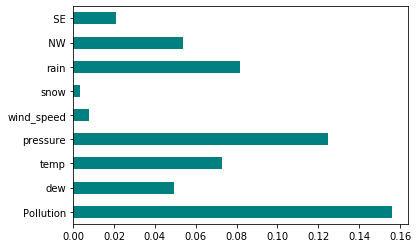

In [15]:
#feature importance
from sklearn.feature_selection import mutual_info_classif
importance =mutual_info_classif(data.iloc[:,1:], data.iloc[:,0])
feature_imp = pd.Series(importance,data.columns[0:len(data.columns) -1])
feature_imp.plot(kind='barh',color='teal')
plt.show()

In [16]:
#dropping snow and rain 
data.drop(['snow','rain'],axis=1,inplace=True)

In [17]:
data.head()

,Pollution,dew,temp,pressure,wind_speed,NW,SE,cv
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,0,1,0


In [18]:
#scale the data 
from sklearn.preprocessing import MinMaxScaler
min_maxScaler = MinMaxScaler(feature_range=(0,1))

In [19]:
scaled_df = min_maxScaler.fit_transform(data)

In [20]:
scaled_df[:5]

array([[0.12977867, 0.35294118, 0.24590164, 0.52727273, 0.00229001,
        0.        , 1.        , 0.        ],
       [0.14889336, 0.36764706, 0.24590164, 0.52727273, 0.00381099,
        0.        , 1.        , 0.        ],
       [0.15995976, 0.42647059, 0.2295082 , 0.54545455, 0.00533197,
        0.        , 1.        , 0.        ],
       [0.18209256, 0.48529412, 0.2295082 , 0.56363636, 0.00839101,
        0.        , 1.        , 0.        ],
       [0.138833  , 0.48529412, 0.2295082 , 0.56363636, 0.00991199,
        0.        , 1.        , 0.        ]])

In [21]:
def series_to_supervised(df, n_input=1,n_output=1,dropna =True):
    n_features  = 1 if type(df) is list else df.shape[1]
    data = pd.DataFrame(df)
    cols, names = list(), list()
    #input sequence (t-n ... t-1)
    for i in range(n_input, 0 , -1):
        cols.append(data.shift(i))
        names += [('var%d(t-%d)'% (j+i, i)) for j in range (n_features)]
    
    #forcast sequence (t , t+1 , t+n)
    for  i in range(0,n_output):
        cols.append(data.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+ 1)) for j in range(n_features)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_features)]
    
    #put all togethers
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    #drop rows with NaN values
    if dropna :
        agg.dropna(inplace=True)
    return agg

In [22]:
reframe_data = series_to_supervised(scaled_df,n_input=1,n_output=1)

In [23]:
reframe_data

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.002290,0.0,1.0,0.0,0.148893,0.367647,0.245902,0.527273,0.003811,0.0,1.0,0.0
2,0.148893,0.367647,0.245902,0.527273,0.003811,0.0,1.0,0.0,0.159960,0.426471,0.229508,0.545455,0.005332,0.0,1.0,0.0
3,0.159960,0.426471,0.229508,0.545455,0.005332,0.0,1.0,0.0,0.182093,0.485294,0.229508,0.563636,0.008391,0.0,1.0,0.0
4,0.182093,0.485294,0.229508,0.563636,0.008391,0.0,1.0,0.0,0.138833,0.485294,0.229508,0.563636,0.009912,0.0,1.0,0.0
5,0.138833,0.485294,0.229508,0.563636,0.009912,0.0,1.0,0.0,0.109658,0.485294,0.213115,0.563636,0.011433,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,0.010060,0.264706,0.278689,0.763636,0.385730,1.0,0.0,0.0,0.008048,0.250000,0.278689,0.781818,0.395659,1.0,0.0,0.0
43796,0.008048,0.250000,0.278689,0.781818,0.395659,1.0,0.0,0.0,0.010060,0.264706,0.262295,0.781818,0.405588,1.0,0.0,0.0
43797,0.010060,0.264706,0.262295,0.781818,0.405588,1.0,0.0,0.0,0.010060,0.264706,0.262295,0.781818,0.413996,1.0,0.0,0.0
43798,0.010060,0.264706,0.262295,0.781818,0.413996,1.0,0.0,0.0,0.008048,0.264706,0.245902,0.781818,0.420866,1.0,0.0,0.0


In [24]:
reframe_data.drop(reframe_data.columns[[9,10,11,12,13,14,15]],axis=1,inplace=True)

In [25]:
reframe_data.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.002290,0.0,1.0,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.003811,0.0,1.0,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545455,0.005332,0.0,1.0,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563636,0.008391,0.0,1.0,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563636,0.009912,0.0,1.0,0.0,0.109658


In [26]:
#split the data into train and test
n_train_hours = 24*3*365 # hours:24, years_to_train:3, Number of days:365
values = reframe_data.values
train_data = values[:n_train_hours,:]
test_data = values[n_train_hours:,:]

In [27]:
X_train, y_train = train_data[:,:-1], train_data[:,-1]
X_test, y_test = test_data[:,:-1], test_data[:,-1]

In [28]:
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((26280, 8), (26280,), (17519, 8), (17519,))

In [29]:
#reshape the data for LSTM model
X_train_3d = X_train.reshape((X_train.shape[0],1,X_train.shape[1])) # reshape(samples_size, timesteps, n_features)
X_test_3d  = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))

In [48]:
# design network
model = keras.Sequential()
model.add(layers.LSTM(50, input_shape=(X_train_3d.shape[1], X_train_3d.shape[2])))
model.add(layers.ReLU())
model.add(layers.Dense(1))
model.compile(loss='mae', optimizer='adam')


In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                11800     
_________________________________________________________________
re_lu_2 (ReLU)               (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(X_train_3d, y_train, epochs=50, batch_size=72, validation_data=(X_test_3d,y_test), verbose=2, shuffle=False)


Train on 26280 samples, validate on 17519 samples
Epoch 1/50
26280/26280 - 3s - loss: 0.0423 - val_loss: 0.0704
Epoch 2/50
26280/26280 - 2s - loss: 0.0180 - val_loss: 0.0348
Epoch 3/50
26280/26280 - 2s - loss: 0.0150 - val_loss: 0.0254
Epoch 4/50
26280/26280 - 2s - loss: 0.0143 - val_loss: 0.0199
Epoch 5/50
26280/26280 - 2s - loss: 0.0140 - val_loss: 0.0168
Epoch 6/50
26280/26280 - 2s - loss: 0.0139 - val_loss: 0.0155
Epoch 7/50
26280/26280 - 2s - loss: 0.0137 - val_loss: 0.0150
Epoch 8/50
26280/26280 - 2s - loss: 0.0139 - val_loss: 0.0151
Epoch 9/50
26280/26280 - 2s - loss: 0.0138 - val_loss: 0.0149
Epoch 10/50
26280/26280 - 2s - loss: 0.0137 - val_loss: 0.0145
Epoch 11/50
26280/26280 - 2s - loss: 0.0137 - val_loss: 0.0144
Epoch 12/50
26280/26280 - 2s - loss: 0.0138 - val_loss: 0.0142
Epoch 13/50
26280/26280 - 2s - loss: 0.0137 - val_loss: 0.0141
Epoch 14/50
26280/26280 - 2s - loss: 0.0137 - val_loss: 0.0137
Epoch 15/50
26280/26280 - 2s - loss: 0.0139 - val_loss: 0.0144
Epoch 16/50
26

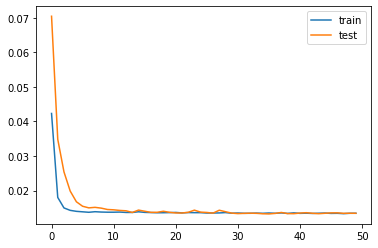

In [39]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [40]:
#make the prediction
y_pred = model.predict(X_test_3d)

In [41]:
X_test = X_test_3d.reshape(X_test_3d.shape[0], X_test_3d.shape[2])

In [42]:
#inversion of scaled data
y_pred = np.concatenate((y_pred,X_test[:,1:]),axis=1)
y_pred = min_maxScaler.inverse_transform(y_pred)

In [43]:
y_pred_inv = y_pred[:,0] 

In [49]:
y_test = y_test.reshape((len(y_test), 1))
y_test_inv = np.concatenate((y_test,X_test[:,1:]), axis=1)
y_test_inv = min_maxScaler.inverse_transform(y_test_inv)

In [50]:
y_test_inv = y_test_inv[:,0]

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

In [53]:
print(rmse)

26.449974141211033
